<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v8/v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import PIL

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.images.shape # 1797 slika, svaka slika 8x8 array

(1797, 8, 8)

In [4]:
digits.data.shape # "flattened" slika, 64-dimenzionalni vektor

(1797, 64)

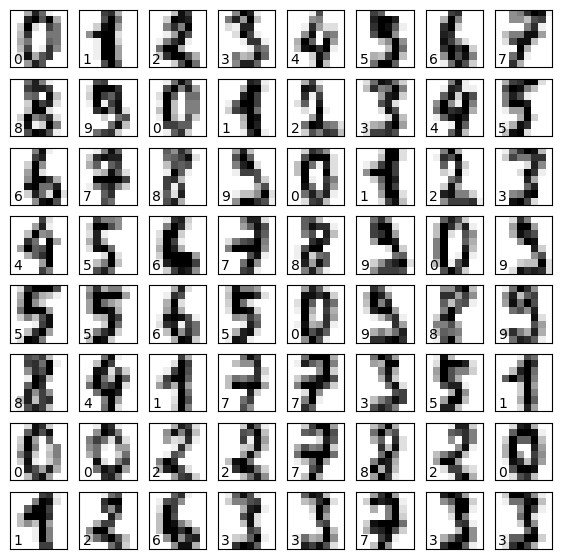

In [5]:
fig = plt.figure(figsize=(7, 7))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0, 7, str(digits.target[i]))

### Zadatak 1.1.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid = GridSearchCV(KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1, 25)}, cv=5, scoring='accuracy')
knn = grid.fit(X_train_scaled, y_train)


In [9]:
from sklearn import metrics

X_test_scaled = scaler.transform(X_test)
y_pred = knn.predict(X_test_scaled)
print("Točnost: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Točnost: 97.11%


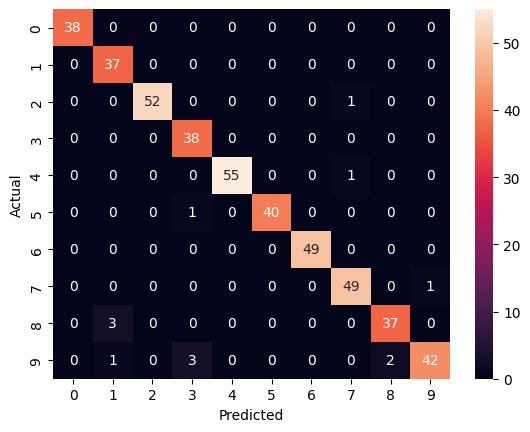

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Zadatak 1.2.

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(digits.data)

KMeans(n_clusters=10)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
digits_pca = pca.fit_transform(digits.data)
centers_pca = pca.transform(kmeans.cluster_centers_)

<Axes: >

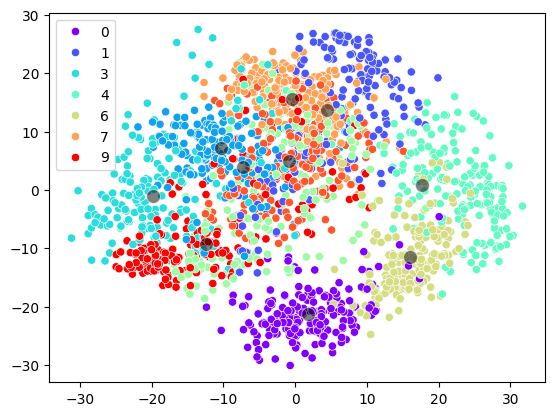

In [15]:
sns.scatterplot(x=digits_pca[:, 0], y=digits_pca[:, 1], hue=digits.target, palette='rainbow')
sns.scatterplot(x=centers_pca[:, 0], y=centers_pca[:, 1], color='black', s = 100, alpha=0.5)

In [16]:
predicted_clusters = kmeans.predict(digits.data)
print("Predicted cluster labels generated.")

Predicted cluster labels generated.


In [17]:
cluster_to_digit_indices = [[] for _ in range(10)]

for digit_index, cluster_label in enumerate(predicted_clusters):
    cluster_to_digit_indices[cluster_label].append(digit_index)

print("Digits grouped by cluster labels.")

Digits grouped by cluster labels.


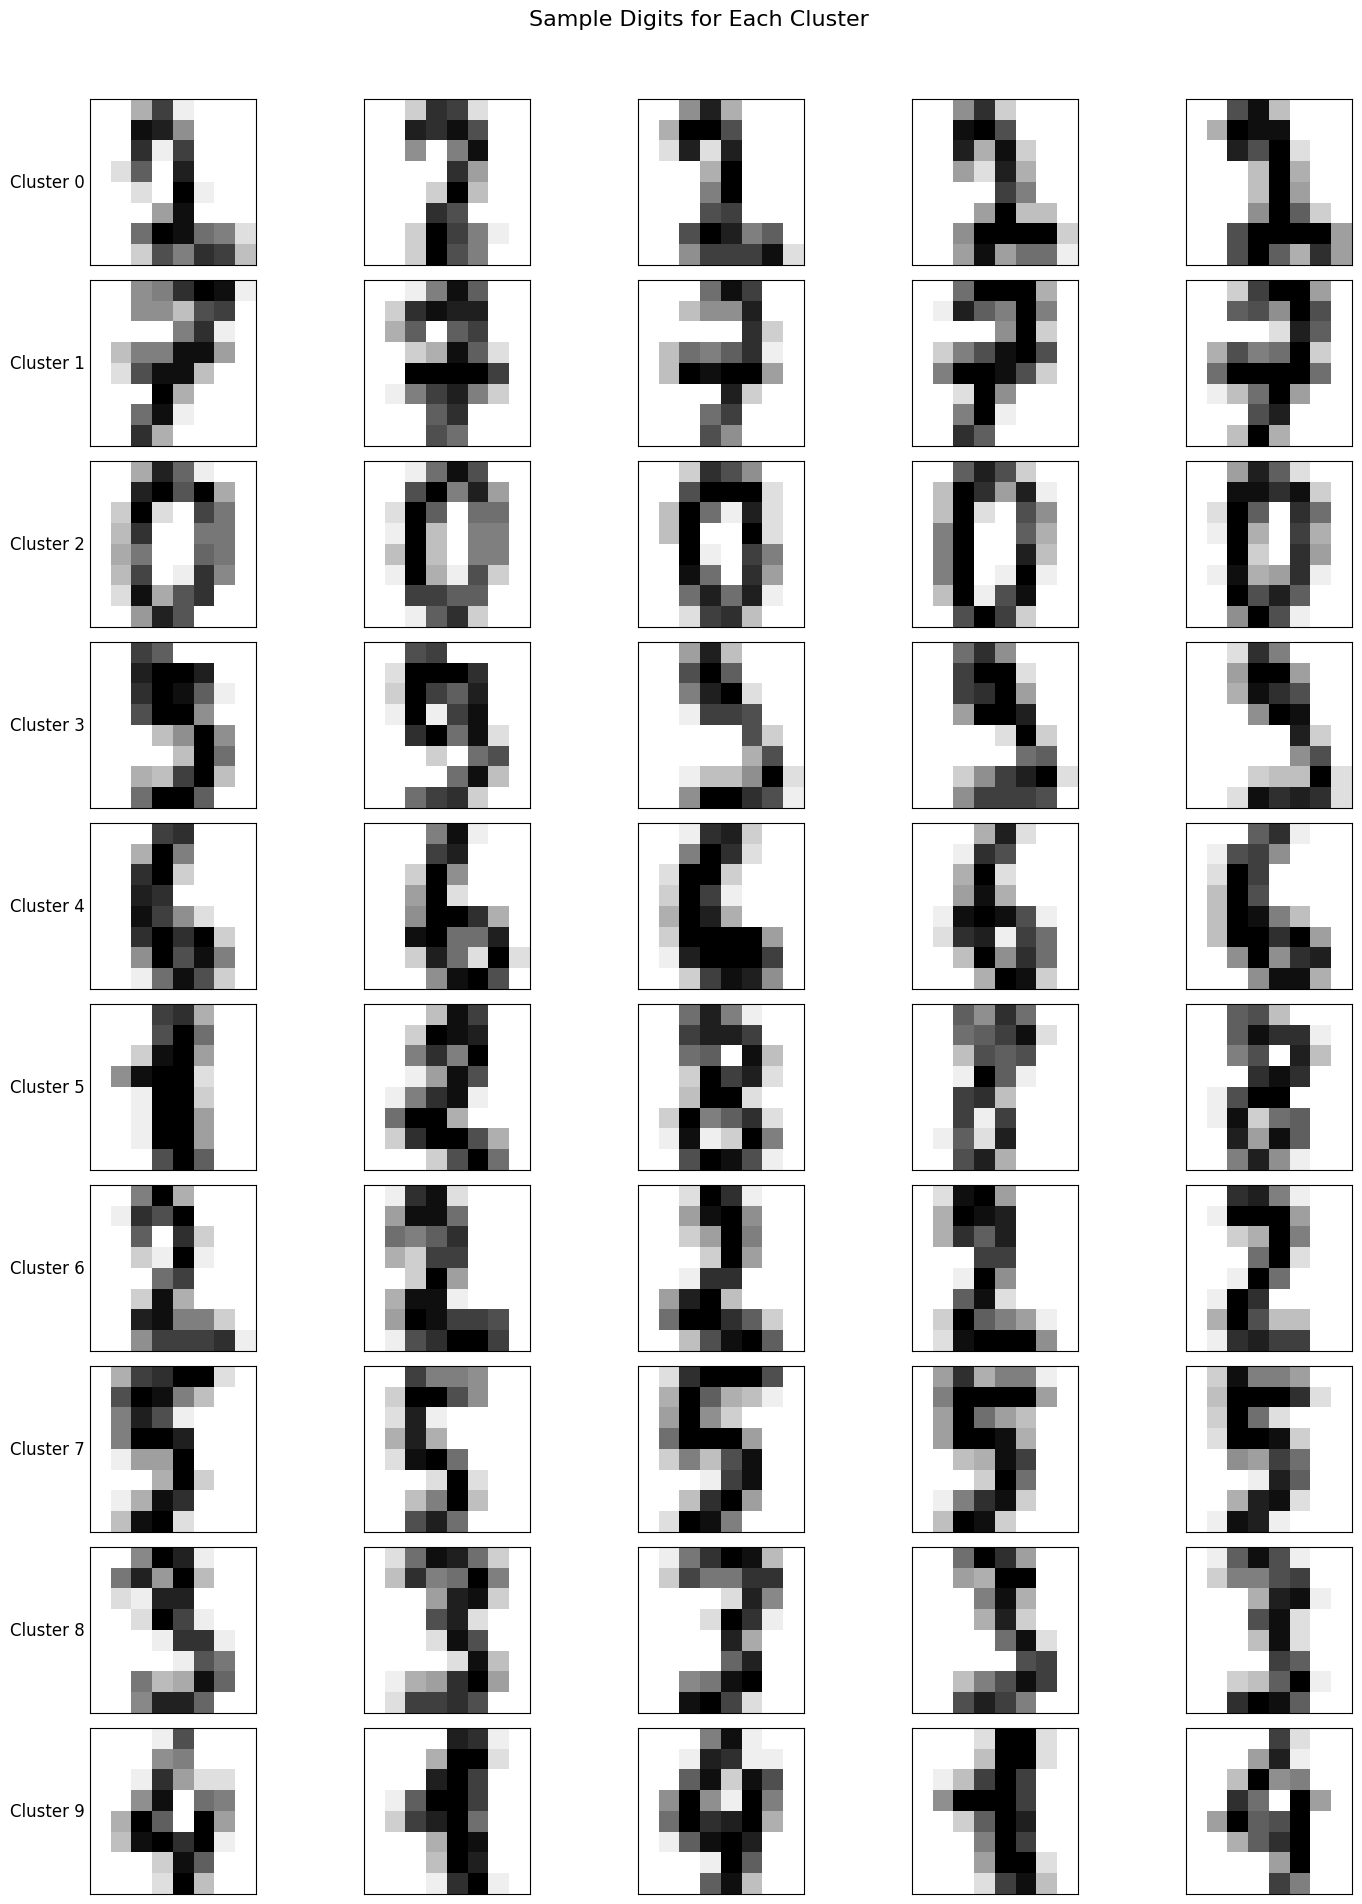

In [18]:
fig = plt.figure(figsize=(15, 20))
fig.suptitle('Sample Digits for Each Cluster', fontsize=16)

num_digits_to_display = 5

for i in range(10):
    current_cluster_indices = cluster_to_digit_indices[i]

    display_indices = current_cluster_indices[:num_digits_to_display]


    for j, digit_original_index in enumerate(display_indices):
        ax = fig.add_subplot(10, num_digits_to_display, i * num_digits_to_display + j + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[digit_original_index], cmap='binary')
        if j == 0:
            ax.set_ylabel(f'Cluster {i}', rotation=0, ha='right', va='center', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


Neke slične znamenke su pridijeljene pogrešnom klasteru druge slične znamenke.

In [25]:
print("Silhouette score: ", round(metrics.silhouette_score(X_test_scaled, y_pred), 3))

Silhouette score:  0.096


Silhouette score od 0.096 znači da se klasteri preklapaju.

### Zadatak 2

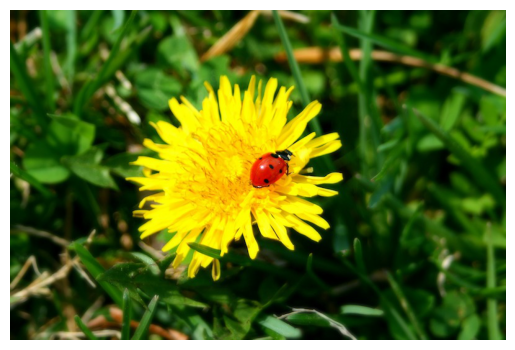

In [39]:
image = plt.imread('/content/drive/MyDrive/ladybug.png')
plt.imshow(image)
plt.axis('off')
plt.show()

In [40]:
X = image.reshape(-1, 3)

In [42]:
segmented_imgs = []         # lista koja sadrži sve segmentirane slike (za k = 2, 4, 6, 8, 10)
n_colors = [2, 4, 6, 8, 10]

# TO-DO: grupiranje podataka/segmentiranje slike

In [56]:
def kmeans(n, X):
  if type(n) == int:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    return kmeans.cluster_centers_, kmeans.labels_
  elif type(n) == list:
    results = []
    for i in n:
      kmeans = KMeans(n_clusters=i)
      kmeans.fit(X)
      results.append((kmeans.cluster_centers_, kmeans.labels_))
    return results
  else:
    print("Pogrešan tip podataka")


In [57]:
kmeans_results = kmeans(n_colors, X)

In [58]:
segmented_imgs = []

for i in range(len(kmeans_results)):
  centers, labels = kmeans_results[i]
  image_segmented = centers[labels].reshape(image.shape)
  segmented_imgs.append(image_segmented)


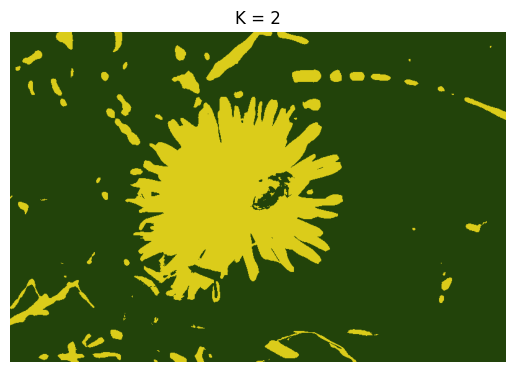

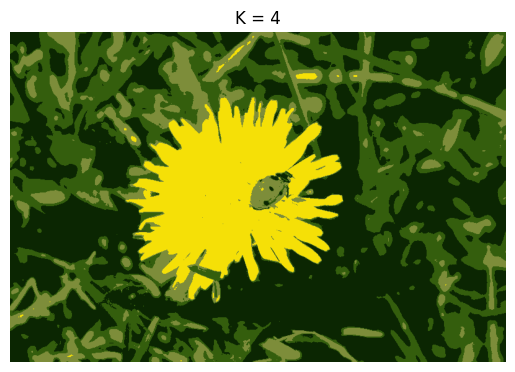

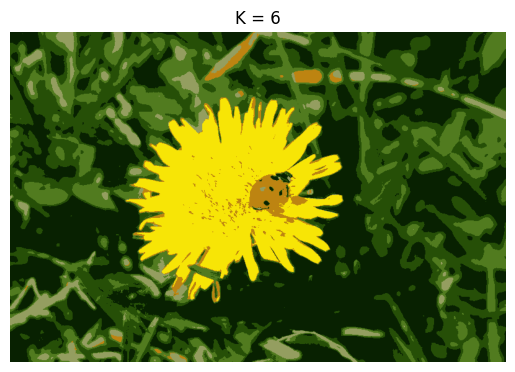

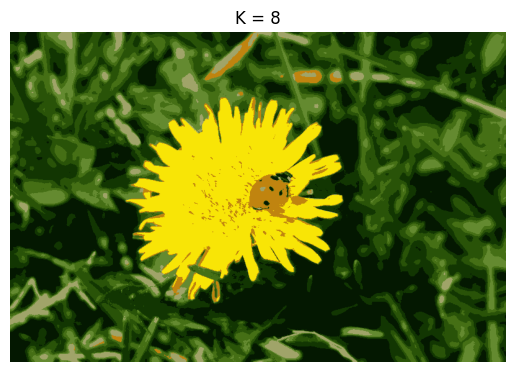

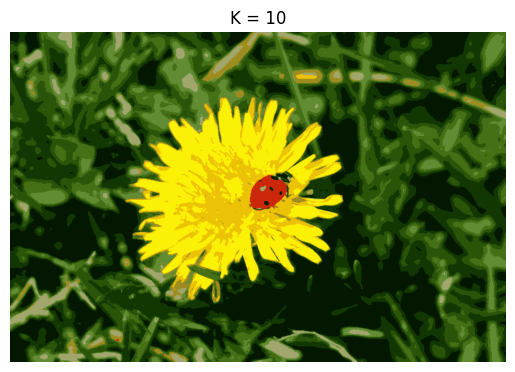

In [60]:
for i in range(len(segmented_imgs)):
  plt.imshow(segmented_imgs[i])
  plt.axis('off')
  plt.title(f'K = {n_colors[i]}')
  plt.show()